<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The aim of this project is to predict the number of food orders that customers will place in the upcoming weeks with the company. **

# **Our dataset has three dataframes: df_meal describing the meals, df_center describing the food centers, and df_food describing the overall food order. **

# **https://www.kaggle.com/kannanaikkal/food-demand-forecasting?select=fulfilment_center_info.csv**

https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
df_meal = pd.read_csv('/content/sample_data/meal_info.csv') 
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
df_center = pd.read_csv('/content/sample_data/fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
df_food = pd.read_csv('/content/sample_data/train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0


**first merge all the three dataframes into a single dataframe. This will make it easier to manipulate the data while plotting it:** **bold text** bold text

In [5]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

# Bar Graph using **matplotlib**
First, we want to find the most popular food item that customers have bought from the company.

I will be using the Pandas pivot_table function to find the total number of orders for each category of the food item:

In [6]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,38776057.0
Biryani,601448.0
Desert,1845596.0
Extras,3812730.0
Fish,775813.0
Other Snacks,4573965.0
Pasta,1558069.0
Pizza,6919016.0
Rice Bowl,20115088.0


try to visualize this using a bar graph.

Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

Bar graph is generated using plt.bar() in matplotlib:

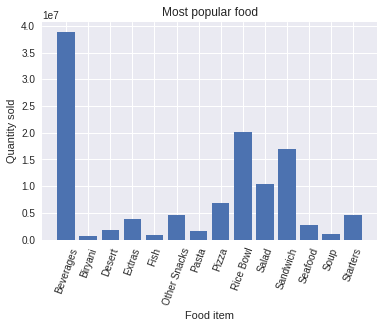

In [25]:
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 

#save plot 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_6.png',dpi=300,bbox_inches='tight') 

#display 
plt.show();

It is always important to label your axis. You can do this by employing the plt.xlabel() and plt.ylabel() functions. You can use plt.title() for naming the title of the plot. If your xticks are overlapping, rotate them using the rotate parameter in plt.xticks() so that they are easy to view for the audience.

You can save your plot using the plt.savefig() function by providing the file path as a parameter. Finally, always display your plot using plt.show().

While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?



Let’s divide the total food item order by the number of unique meals it is present in.

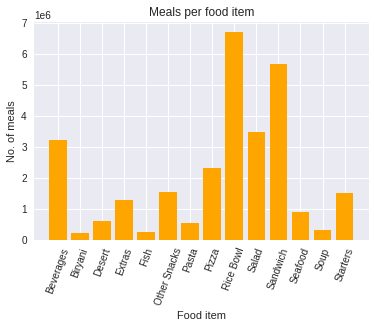

In [19]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')

#save plot
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')

#display plot
plt.show();

our hypothesis was correct! Rice Bowl was indeed the most popular food item sold by the company.

Bar graphs should not be used for continuous values.

Pie Chart using matplotlib
Let us now see the ratio of orders from each cuisine.

A pie chart is suitable to show the proportional distribution of items within the same category.

In [37]:
#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

#cuisine
  c=df['cuisine'].unique()[i]

#num of orders for the cuisine
c_order = df[df['cuisine']==c]['num_orders'].sum()
d_cuisine[c] = c_order/total

In [ ]:
#pie plot 
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.1f',explode=[0,0,0.1,0]) 

#label the plot 
plt.title('Cuisine share %') 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_8.png',dpi=300,bbox_inches='tight') 
plt.show();

I used plt.pie() to draw the pie chart and adjust its parameters to make it more appealing
The autopct parameter was used to print the values within the pie chart up to 1 decimal place
The explode parameter was used to offset the Italian wedge to make it stand out from the rest. This makes it instantly clear to the viewer that people love Italian food!
A pie chart is rendered useless when there are a lot of items within a category. This will decrease the size of each slice and there will be no distinction between the items.

 

# **Box Plot using matplotlib**
Since we are discussing cuisine, let’s check out which one is the most expensive cuisine! For this, I will be using a Box Plot.

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively
The top whisker represents Q3+1.5*IQR
The bottom whisker represents Q1-1.5*IQR
Outliers are shown as scatter points
Shows skewness in the data

In [48]:
#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


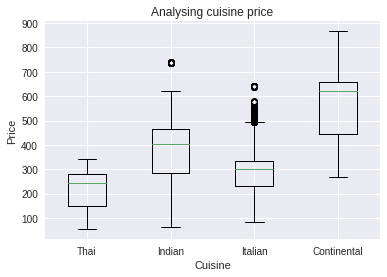

In [49]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#save and display 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show();

Continental cuisine was the most expensive cuisine served by the company! Even its median price is higher than the maximum price of all the cuisines.

Box plot does not show the distribution of data points within each group.

 

# **Histogram using matplotlib**
On the topic of prices, did we forget to inspect the base price and checkout price? Don’t worry, we will do that using a histogram.

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

Since base_price is a continuous variable, we will inspect its range in different distinct orders using a histogram. We can do this using plt.hist().

But the confusing part is what should be the number of bins? By default, it is 10. However, there is no correct answer and you can vary it according to your dataset to best visualize it.

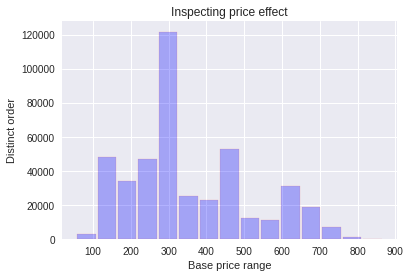

In [50]:
#plotting histogram 
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 

#plot title 
plt.title('Inspecting price effect') 

#save and display the plot 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

I have chosen the number of bins as 15 and it is evident that most of the orders had a base price of ~300.

It is easy to confuse histograms with bar plots. But remember, histograms are used with continuous data whereas bar plots are used with categorical data.

# **Line Plot and Subplots using matplotlib**
A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.

How are the weekly and monthly sales of the company varying? This is a critical business question that makes or breaks the marketing strategy.

Before exploring that, I will create two lists for storing the week-wise and month-wise revenue of the company:

In [51]:
#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

I will compare the revenue of the company in every week as well as in every month using two line-plots drawn side by side. For this, I will be using the plt.subplots() function.

Matplotlib subplots makes it easy to view and compare different plots in the same figure.

To understand how this function works, you need to know what Figure, Axes, and Axis are in a matplotlib plot.

Figure is the outermost container for the Matplotlib plot(s). There can a single or multiple plots, called Axes, within a Figure. Each of these Axes contains the x and y-axis known as the Axis.

The plt.subplots() figure returns the figure and axes. You can provide as an input to the function how you want to display the axes within the figure. These will be adjusted using the nrows and ncols parameters. You can even adjust the size of the figure using the figsize parameter.

Axes are returned as a list. To plot for specific axes, you can access them as a list object. The rest of the plotting is done the same way as simple plots:

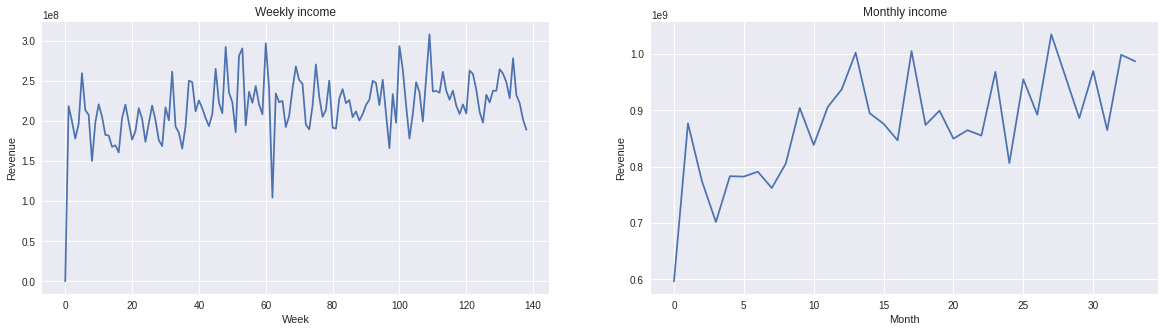

In [52]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

#save and display the plot 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 
plt.show();

We can see an increasing trend in the number of food orders with the number of weeks and months, though the trend is not very strong.

 

# **Scatter Plot using matplotlib**
Finally, I will try to analyze whether the center type had any effect on the number of orders from different center types. I will do this by comparing a scatter plot, a boxplot and a bar graph in the same figure.

We have already seen the use of boxplots and bar graphs, but scatter plots have their own advantages.

Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


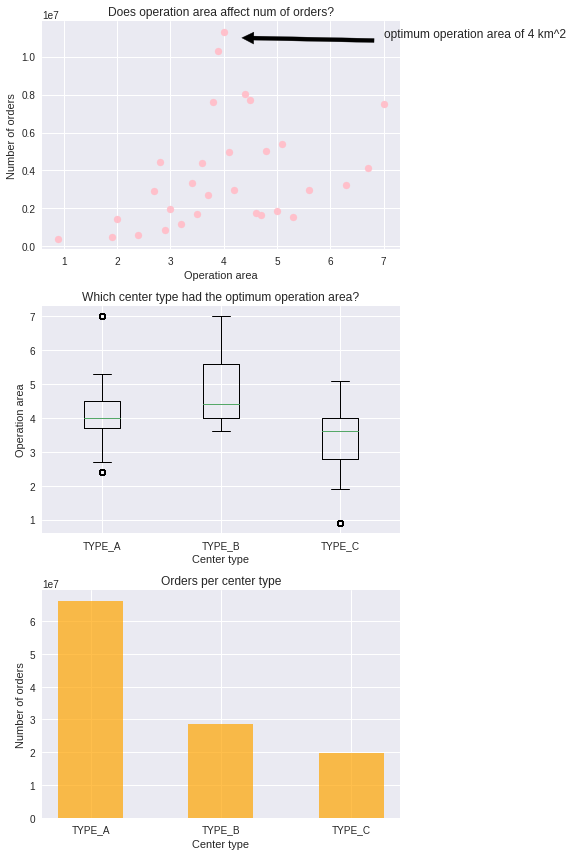

In [53]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

#relation between op area and number of orders 
op_table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum) 

#relation between center type and op area 
c_type = {} 
for i in center_type_name: 
    c_type[i] = df[df['center_type']==i].op_area 

#relation between center type and num of orders 
center_table=pd.pivot_table(df,index='center_type',values='num_orders',aggfunc=np.sum) 

#subplots 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

#scatter plots 
ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

#boxplot 
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

#bar graph 
ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

#show figure 
plt.tight_layout() 
plt.savefig('C:\\Users\\computerscience\\Desktop\\datasets\\food\\matplotlib_plotting_12.png',dpi=300,bbox_inches='tight') 
plt.show();

The scatter plot makes it instantly visible that the optimum operation area of a center is 4 km sq. The boxplot shows that the TYPE_A center type had the most number of optimum size centers because of a compact box with a median around 4 km sq. Because of this, they had more orders placed by customers than any other center type.